<a href="https://colab.research.google.com/github/makarandmadhavi/Crash-Course-in-Statistical-Learning/blob/main/Worked_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Splitting data and checking data distribution

# Marketting Campaign Dataset

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [2]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning and feature selection

In [3]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)

data.head()

,ID,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
0,5524,63,2,58138.0,2675,58,3,7,0,3,11,1,0,1617,22,0,0,1
1,2174,66,2,46344.0,2125,38,2,5,0,3,11,0,2,27,4,0,0,1
2,4141,55,2,71613.0,2324,26,1,4,0,3,11,0,0,776,20,0,1,0
3,6182,36,2,26646.0,2151,26,2,6,0,3,11,0,1,53,6,0,1,0
4,5324,39,4,58293.0,2173,94,5,5,0,3,11,0,1,422,14,0,1,0


In [4]:
data.describe()

,ID,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,51.194196,2.665625,52253.592375,2365.582143,49.109375,2.325000,5.316518,0.009375,3.0,11.0,0.149107,0.950446,605.798214,12.537054,0.297768,0.644643,0.355357
std,3246.662198,11.984069,0.839658,25039.085601,202.122512,28.962453,1.932238,2.426645,0.096391,0.0,0.0,0.356274,0.751803,602.249288,7.205741,0.678381,0.478728,0.478728
min,0.000000,24.000000,1.000000,1730.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,43.000000,2.000000,35538.750000,2192.750000,24.000000,1.000000,3.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,6.000000,0.000000,0.000000,0.000000
50%,5458.500000,50.000000,2.000000,51609.500000,2367.500000,49.000000,2.000000,6.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,12.000000,0.000000,1.000000,0.000000
75%,8427.750000,61.000000,3.000000,68289.750000,2541.000000,74.000000,3.000000,7.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,18.000000,0.000000,1.000000,1.000000
max,11191.000000,127.000000,4.000000,666666.000000,2711.000000,99.000000,15.000000,20.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,32.000000,4.000000,1.000000,1.000000


## Data Splitting and logistic regression

In [5]:
from sklearn.model_selection import  train_test_split

X = data[ ["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

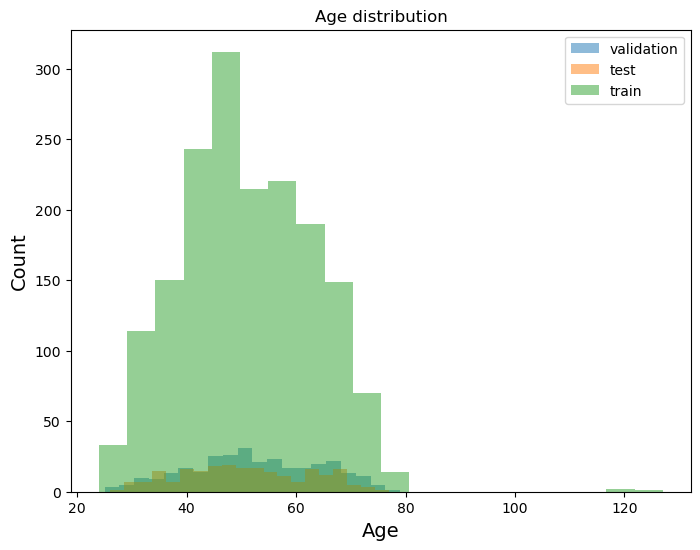

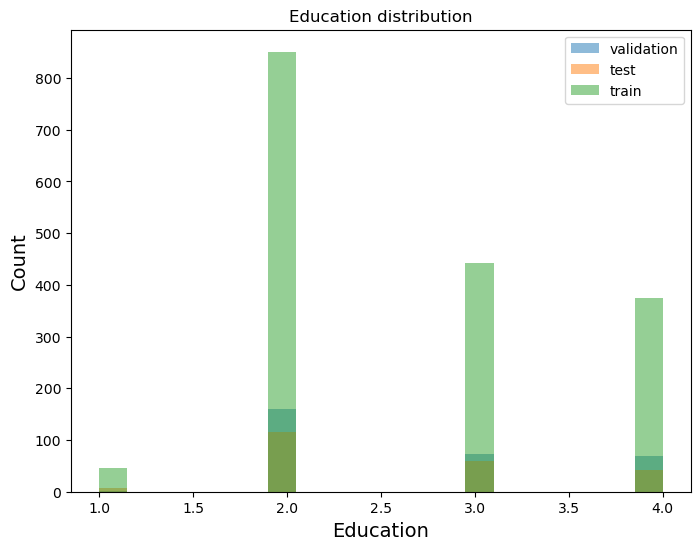

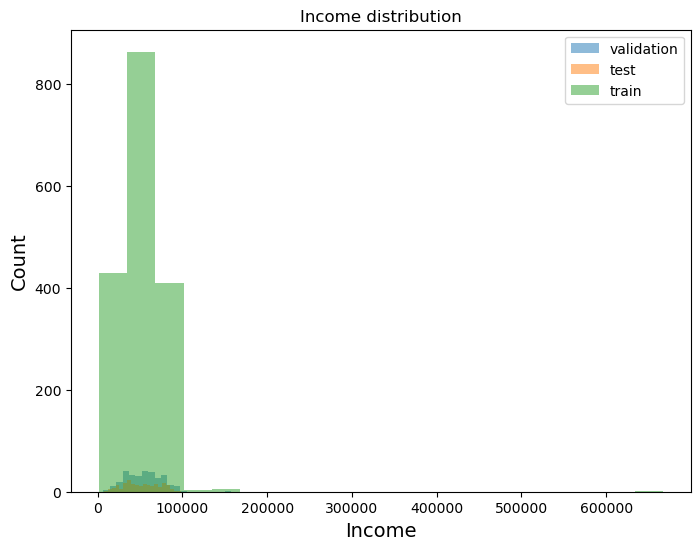

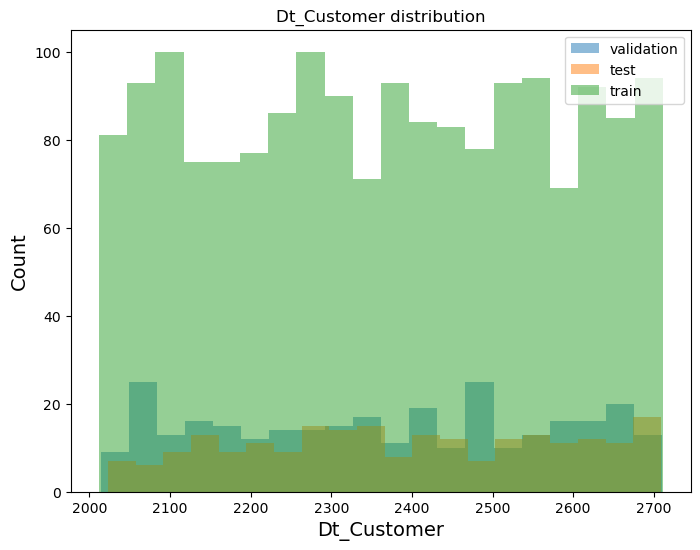

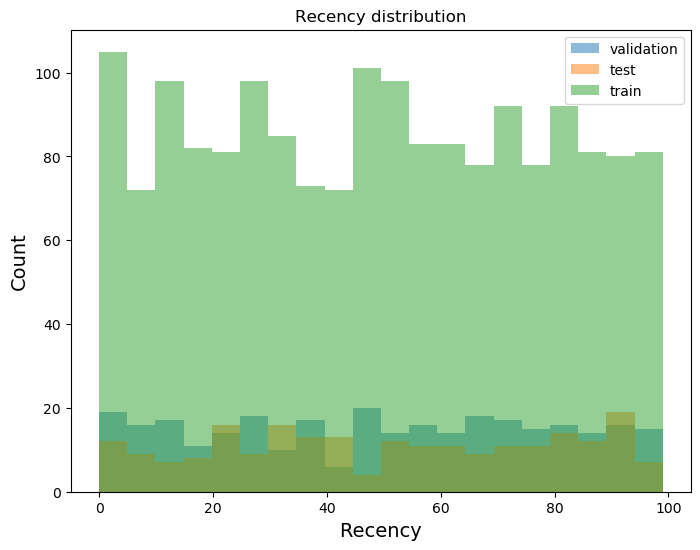

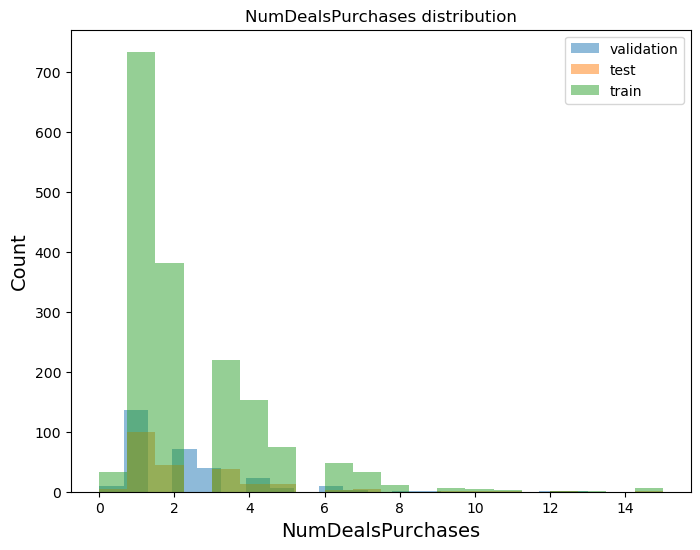

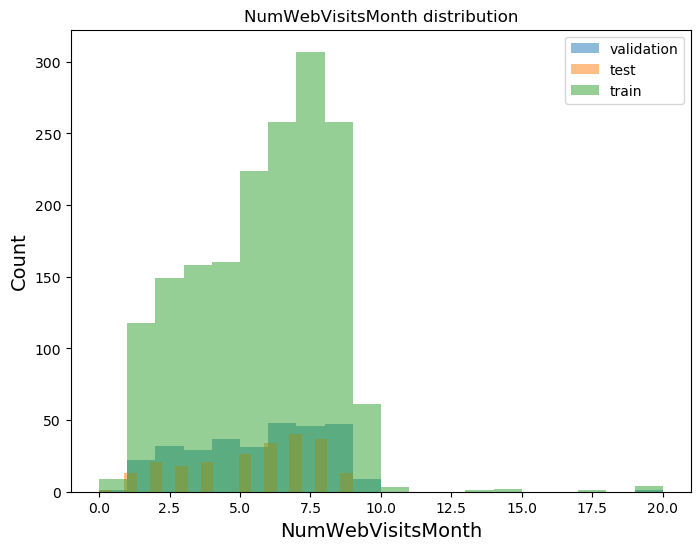

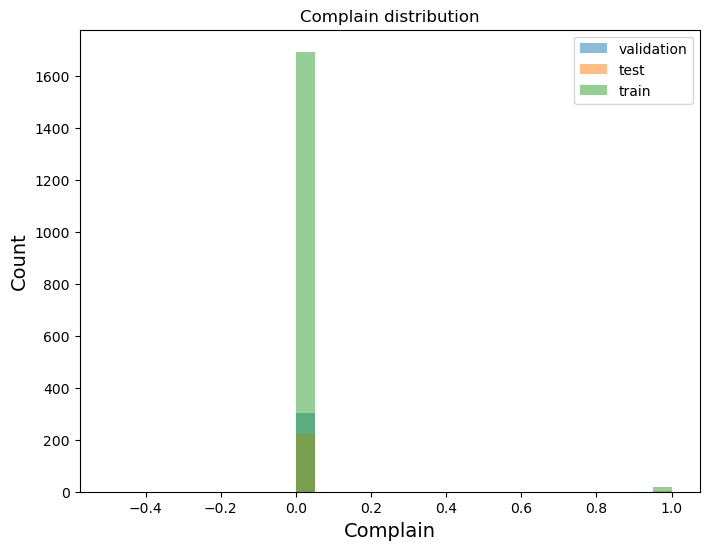

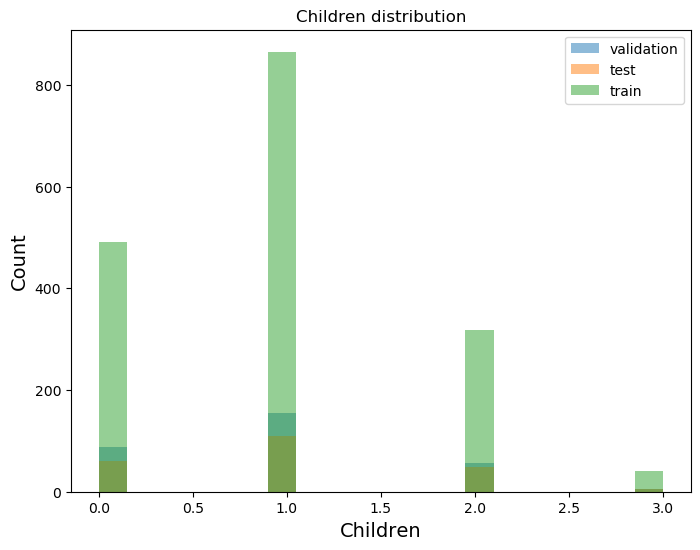

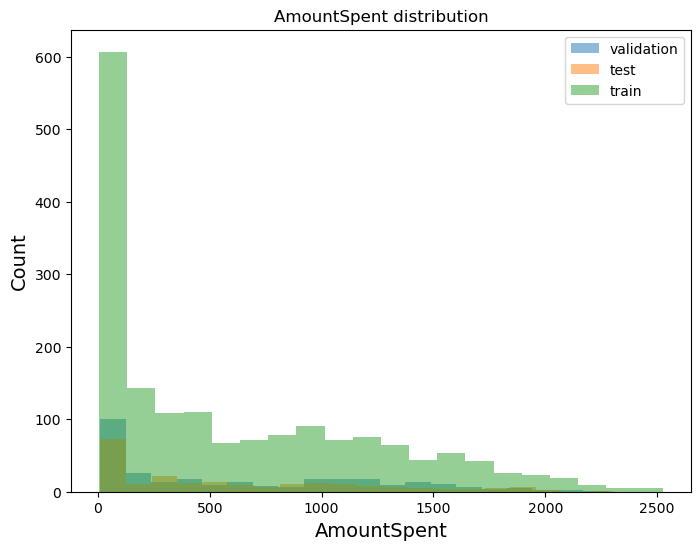

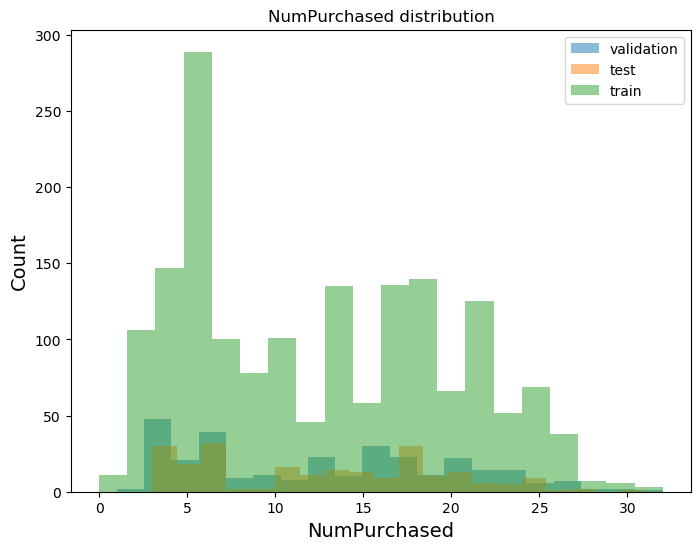

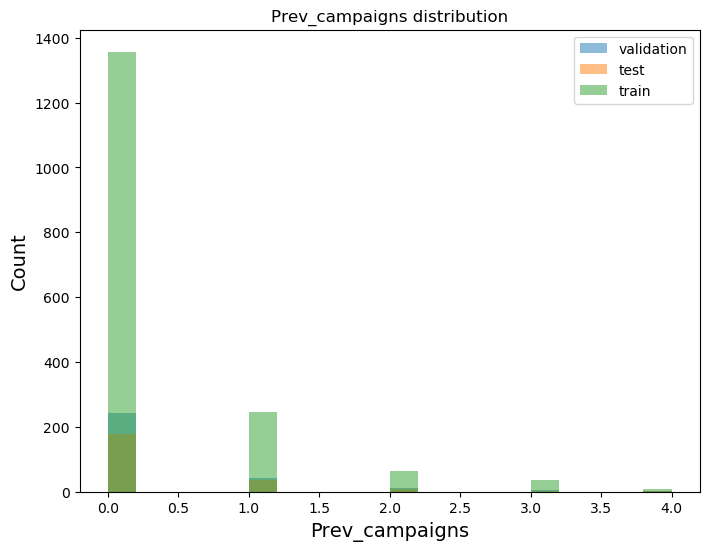

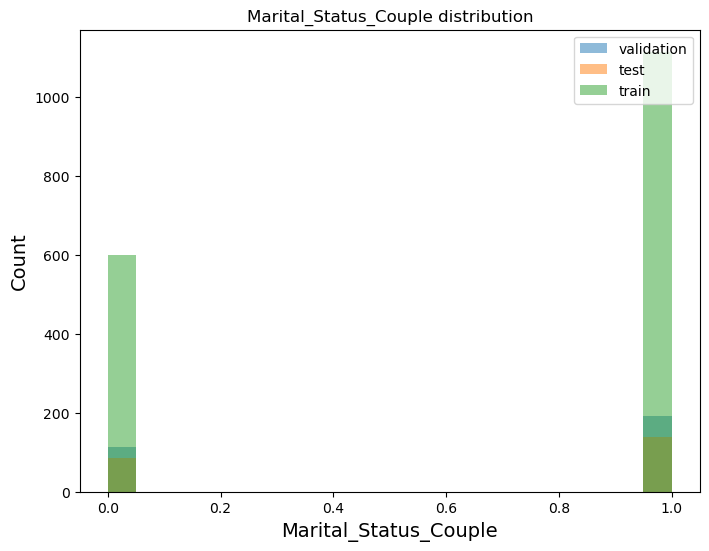

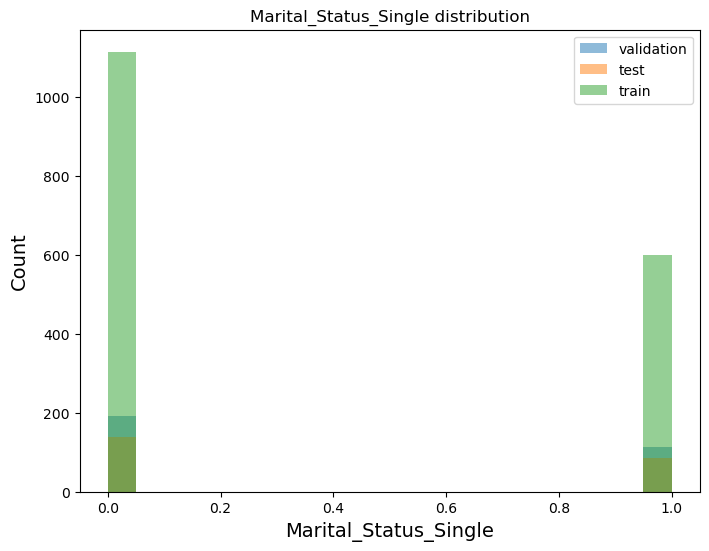

In [6]:
# Looking the data for test, training and validation set
X_test_plot = X_test[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

X_val_plot = X_val[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

X_train_plot = X_train[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Distribution of data is normal across train test and validation sets

In [7]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
loggreg_final=logreg.fit(X_train,y_train)
print(loggreg_final.score(X_train,y_train))

0.851138353765324


# Online News Popularity Dataset

Download the dataset - https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).

Content
The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content is publicly accessed and retrieved using the provided URLs.
Acquisition date: January 8, 2015
The estimated relative performance values were estimated by the authors using a Random Forest classifier and rolling windows as assessment method.. See their article for more details on how the relative performance values were set.



In [50]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/Crash-Course-in-Statistical-Learning/b08a086d03923e176429bbbe6c14cd576f063b1f/OnlineNewsPopularity.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Attribute Information:
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:

1. url: URL of the article (non-predictive)
2. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
3. n_tokens_title: Number of words in the title
4. n_tokens_content: Number of words in the content
5. n_unique_tokens: Rate of unique words in the content
6. n_non_stop_words: Rate of non-stop words in the content
7. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
8. num_hrefs: Number of links
9. num_self_hrefs: Number of links to other articles published by Mashable
10. num_imgs: Number of images
11. num_videos: Number of videos
12. average_token_length: Average length of the words in the content
13. num_keywords: Number of keywords in the metadata
1. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
1. data_channel_is_entertainment: Is data channel 'Entertainment'?
1. data_channel_is_bus: Is data channel 'Business'?
1. data_channel_is_socmed: Is data channel 'Social Media'?
1. data_channel_is_tech: Is data channel 'Tech'?
1. data_channel_is_world: Is data channel 'World'?
1. kw_min_min: Worst keyword (min. shares)
1. kw_max_min: Worst keyword (max. shares)
1. kw_avg_min: Worst keyword (avg. shares)
1. kw_min_max: Best keyword (min. shares)
1. kw_max_max: Best keyword (max. shares)
1. kw_avg_max: Best keyword (avg. shares)
1. kw_min_avg: Avg. keyword (min. shares)
1. kw_max_avg: Avg. keyword (max. shares)
1. kw_avg_avg: Avg. keyword (avg. shares)
1. self_reference_min_shares: Min. shares of referenced articles in Mashable
1. self_reference_max_shares: Max. shares of referenced articles in Mashable
1. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
1. weekday_is_monday: Was the article published on a Monday?
1. weekday_is_tuesday: Was the article published on a Tuesday?
1. weekday_is_wednesday: Was the article published on a Wednesday?
1. weekday_is_thursday: Was the article published on a Thursday?
1. weekday_is_friday: Was the article published on a Friday?
1. weekday_is_saturday: Was the article published on a Saturday?
1. weekday_is_sunday: Was the article published on a Sunday?
1. is_weekend: Was the article published on the weekend?
1. LDA_00: Closeness to LDA topic 0
1. LDA_01: Closeness to LDA topic 1
1. LDA_02: Closeness to LDA topic 2
1. LDA_03: Closeness to LDA topic 3
1. LDA_04: Closeness to LDA topic 4
1. global_subjectivity: Text subjectivity
1. global_sentiment_polarity: Text sentiment polarity
1. global_rate_positive_words: Rate of positive words in the content
1. global_rate_negative_words: Rate of negative words in the content
1. rate_positive_words: Rate of positive words among non-neutral tokens
1. rate_negative_words: Rate of negative words among non-neutral tokens
1. avg_positive_polarity: Avg. polarity of positive words
1. min_positive_polarity: Min. polarity of positive words
1. max_positive_polarity: Max. polarity of positive words
1. avg_negative_polarity: Avg. polarity of negative words
1. min_negative_polarity: Min. polarity of negative words
1. max_negative_polarity: Max. polarity of negative words
1. title_subjectivity: Title subjectivity
1. title_sentiment_polarity: Title polarity
1. abs_title_subjectivity: Absolute subjectivity level
1. abs_title_sentiment_polarity: Absolute polarity level
1. shares: Number of shares (target)

In [12]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [23]:
from sklearn.model_selection import  train_test_split

X = data.copy()
# .drop(columns = ["url","timedelta","shares"],inplace = True)

X.drop(columns=['url',' timedelta',' shares'])

y = data[' shares']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

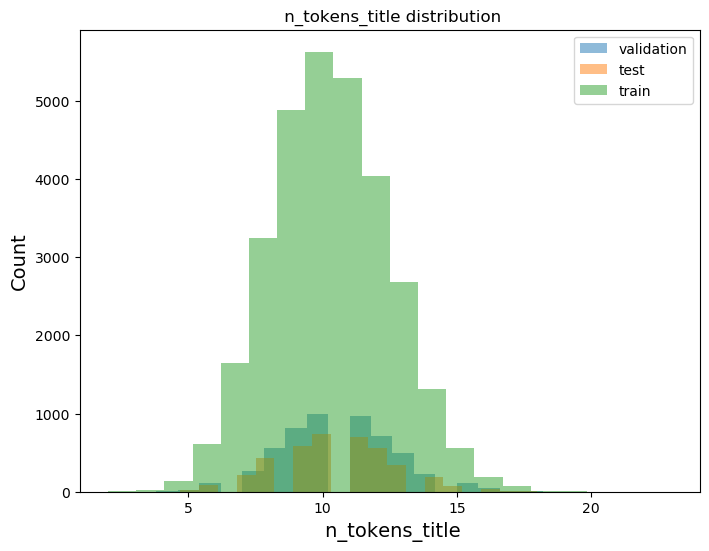

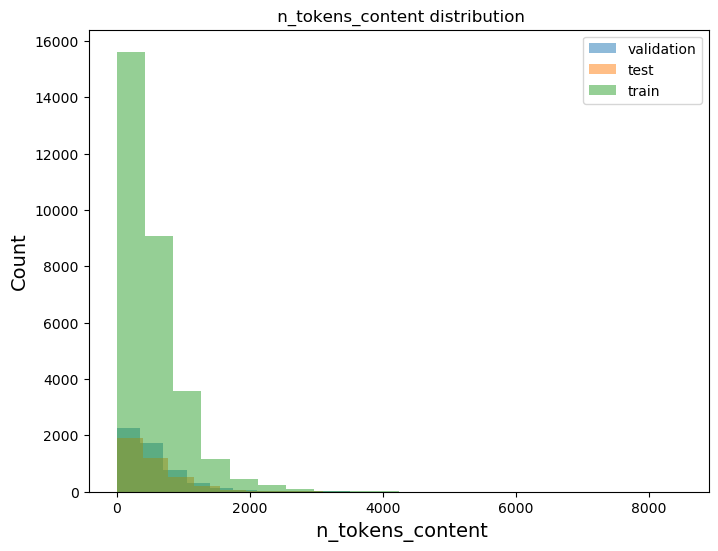

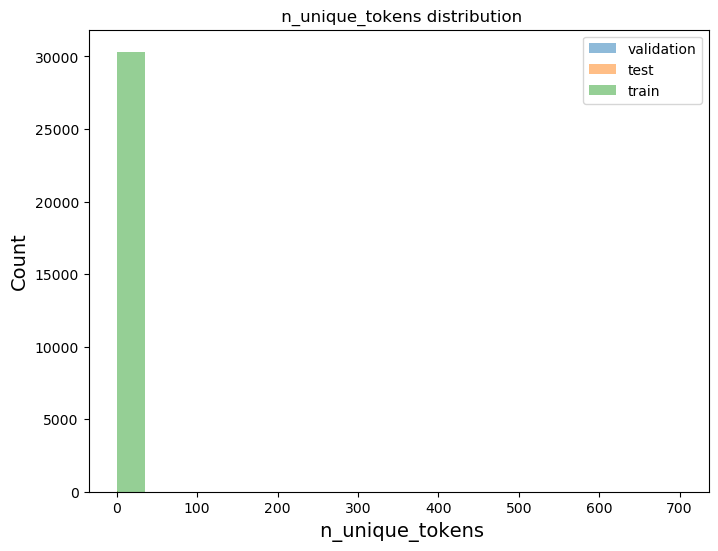

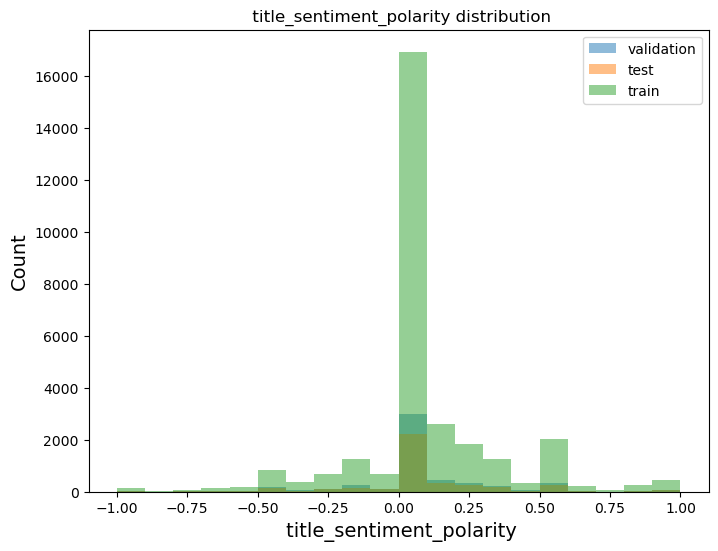

In [28]:
# Looking the data for test, training and validation set
X_test_plot = X_test[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' title_sentiment_polarity']]

X_val_plot = X_val[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' title_sentiment_polarity']]

X_train_plot = X_train[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' title_sentiment_polarity']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Data distribution appears normal

## Linear Regression and Getting Variable importance

In [51]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
x = data.copy()
x.drop(columns=['url',' timedelta',' shares'],inplace = True)

model = sm.OLS(data[' shares'], x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          8.49e-158
Time:                        19:26:46   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
 n_tokens_title                   89.8590     28.671      3.134      0.002      33.662     146.056
 n_tokens_content                  0.5936      0.224      2.656      0.008       0.156       1.032
 n_unique_tokens                3985.3285   1918.563      2.077      0.038     224.899    7745.758
 n_non_stop_words              -1483.6417   5910.913     -0.251      0.802   -1.31e+04    1.01e+04
 n_non_stop_unique_tokens      -1640.5083   1629.463     -1.007      0.314   -4834.295    1553.278
 num_hrefs                        26.5413      6.706      3.958      0.000      13.397      39.686
 num_self_hrefs                  -57.6437     17.818     -3.235      0.001     -92.567     -22.720
 num_imgs                         11.8973      8.942      1.330      0.183      -5.629      29.424
 num_videos                        5.6446     15.751      0.358      0.720     -25.227      36.516
 average_token_length           -586.7282    242.856     -2.416      0.016   -1062.731    -110.725
 num_keywords                     49.4938     37.137      1.333      0.183     -23.295     122.282
 data_channel_is_lifestyle     -1050.0274    394.651     -2.661      0.008   -1823.553    -276.502
 data_channel_is_entertainment -1180.4984    255.195     -4.626      0.000   -1680.687    -680.310
 data_channel_is_bus            -802.3199    382.716     -2.096      0.036   -1552.452     -52.188
 data_channel_is_socmed         -602.9409    372.377     -1.619      0.105   -1332.809     126.927
 data_channel_is_tech           -550.9452    371.426     -1.483      0.138   -1278.948     177.058
 data_channel_is_world          -483.0776    376.363     -1.284      0.199   -1220.758     254.603
 kw_min_min                        2.2088      1.623      1.361      0.174      -0.973       5.391
 kw_max_min                        0.0872      0.050      1.739      0.082      -0.011       0.185
 kw_avg_min                       -0.3468      0.308     -1.127      0.260      -0.950       0.257
 kw_min_max                       -0.0021      0.001     -1.761      0.078      -0.004       0.000
 kw_max_max                       -0.0005      0.001     -0.890      0.373      -0.002       0.001
 kw_avg_max                       -0.0007      0.001     -0.867      0.386      -0.002       0.001
 kw_min_avg                       -0.3659      0.076     -4.836      0.000      -0.514      -0.218
 kw_max_avg                       -0.2026      0.025     -8.010      0.000      -0.252      -0.153
 kw_avg_avg                        1.6625      0.144     11.558      0.000       1.381       1.944
 self_reference_min_shares         0.0262      0.008      3.476      0.001       0.011       0.041
 self_reference_max_shares         0.0058      0.004      1.411      0.158      -0.002       0.014
 self_referenc

1. p value shows which variables are significant. only variables with p value < 0.05 are significant

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 Makarand Madhavi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.